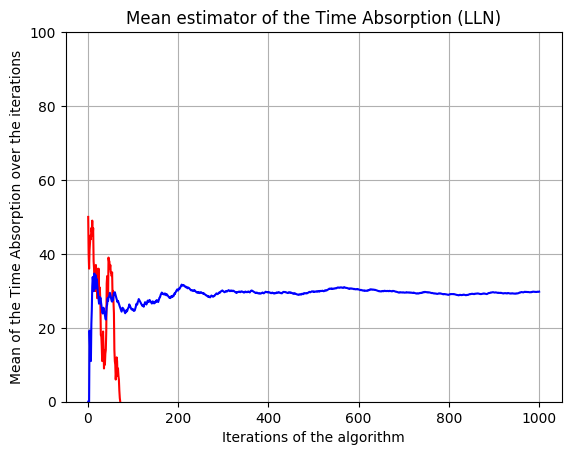

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffa0feb9748>

In [12]:
using PyPlot


function nextGeneration(populationSize, proportion)
    """Returns the proportion of the new generation, 
    using the old generation."""
    newProportion = 0
    for i in 1:populationSize
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() < proportion/populationSize
            newProportion += 1
        end
    end
    return newProportion
end


function trajectory(populationSize, initialProportion, finalTime, booleanPlot)
    """Run the Wright-Fisher model algorithm.
    finalTime is how many generations you produce.
    booleanPlot : true if you want to plot the trajectory, false if you do not."""
    
    listOfProportions = Float64[]
    infTimeAbsorption = 0
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to the plot
    push!(listOfProportions, currentProportion)

    for time in 2:finalTime
        
        currentProportion = nextGeneration(populationSize, currentProportion)
        
        # Getting the time of absorption
        if (infTimeAbsorption == 0) && (currentProportion == 0 || currentProportion == populationSize)
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the plot
        push!(listOfProportions, currentProportion)
        
        # Break the loop when an absorbance state is reached
        if (infTimeAbsorption != 0)
            finalTime = time
            break
        end
    end

    
    # Plot
    if (booleanPlot)
        ioff()

        listOfTimes = collect(1:finalTime)

        title("Proportion over time")
        xlabel("Time")
        ylabel("Proportion")
        ylim(0,populationSize)
        grid(true)

        plot(listOfTimes, listOfProportions, color="red")
    end
    
    # For now, it returns the time of absorption, 0 if there is none
    return infTimeAbsorption
end

#########################################################################################
# Plot of a trajectory
#########################################################################################
trajectory(100,50,100,true)

#########################################################################################
# Mean of the Time Absorption using the law of large numbers
#########################################################################################

function LLN_InfTimeAbsorption(numberOfIterations, populationSize, initialProportion, finalTime, booleanPlot)
    """Runs the Wright-Fisher Algorithm to simulate the Law of Large Numbers for the minimum time of Absorption.
    numberOfIterations is how many times you run the Wright-Fisher Algorithm"""


    # For the plot
    iterations = collect(1:numberOfIterations)
    # For now it has 2 vectors to access all the informations easily. Only the one storing the
    # arithmetic mean is needed though.
    collectionOfTimeAbsorption = Float64[]
    arithmeticMeanTimeAbsorption = Float64[]

    # Algorithm
    # Every plot is cancelled

    # Initialization
    res = trajectory(populationSize, initialProportion, finalTime, false)
    push!(collectionOfTimeAbsorption, res)
    push!(arithmeticMeanTimeAbsorption, res)

    for i in 2:numberOfIterations
        res = trajectory(populationSize, initialProportion, finalTime, false)
        push!(collectionOfTimeAbsorption, res)
        push!(arithmeticMeanTimeAbsorption, (arithmeticMeanTimeAbsorption[end]*(i-1)+res)/i)
    end
    
    if (booleanPlot)
        ioff()
        title("Mean estimator of the Time Absorption (LLN)")
        xlabel("Iterations of the algorithm")
        ylabel("Mean of the Time Absorption over the iterations")
        grid(true)
        plot(iterations, arithmeticMeanTimeAbsorption, color="blue")
    end
end

LLN_InfTimeAbsorption(1000, 100, 50, 100, true)